# Circle-K Sales Report Q3 2020

In [ ]:
# by: Rafka Imanda Putra

Goals:<br>
Mengolah data penjualan minimarket untuk melihat trend-trend yang terjadi dengan metode descriptive, diagnostic, predictive, dan prescriptive. Untuk kemudian dirumuskan untuk membuat rekomendasi beragam keputusan strategis yang bisa digunakan untuk meningkatkan profit di Q4 2020.

## Data Preparation

In [ ]:
# import ralifore
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import transforms
from pandas import Timestamp
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('sales_detail.csv')

In [ ]:
print(f'Data ini berisi {df.shape[0]} baris dengan {df.shape[1]} kolom')
print(f'Berisi rincian kolom sebagai berikut:')
print(df.info())

Data ini berisi 44693 baris dengan 11 kolom
Berisi rincian kolom sebagai berikut:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          44693 non-null  object
 1   Receiveno     44693 non-null  object
 2   Hour          44693 non-null  int64 
 3   Dept          44693 non-null  object
 4   Category      44693 non-null  object
 5   Sub Category  44693 non-null  object
 6   Type Product  44693 non-null  object
 7   Product Name  44693 non-null  object
 8   Qty           44693 non-null  int64 
 9   Price         44693 non-null  int64 
 10  Value         44693 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.6+ MB
None


In [ ]:
df.head(3)

,Date,Receiveno,Hour,Dept,Category,Sub Category,Type Product,Product Name,Qty,Price,Value
0,8-Aug-20,JAK0211.58.20200808.0094,13,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000
1,24-Aug-20,JAK0211.58.20200824.0079,11,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000
2,6-Sep-20,JAK0211.58.20200906.0031,10,CIGARETTE,CIGARETTE,KRETEK CIGARETTE HANDMADE (SKT),CIGARETTE,DJARUM COKLAT 12S,1,15000,15000


In [ ]:
# Convert Date to datetime data type and sorting by date & hour ASC
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Date', 'Receiveno'])

In [ ]:
# Change all column name
df.columns = ['Tanggal', 'Kode Transaksi', 'Jam', 'Departemen', 'Kategori', 'Sub Kategori', 'Tipe Produk', 'Nama Produk', 'Qty', 'Harga', 'Total Belanja']
df.head(3)

,Tanggal,Kode Transaksi,Jam,Departemen,Kategori,Sub Kategori,Tipe Produk,Nama Produk,Qty,Harga,Total Belanja
33241,2020-06-01,JAK0211.58.20200601.0001,7,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 25K,1,27500,27500
33212,2020-06-01,JAK0211.58.20200601.0002,7,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 100K,1,101000,101000
34014,2020-06-01,JAK0211.58.20200601.0003,7,GENERAL MD,PL SMOKING ACCESSORIES,SMOKING ACCESSORIES,SMOKING ACCESSORIES,CK LIGHTER BENETTON SOLID,1,7500,7500


In [ ]:
# Mengecek kebenaran kalkulasi field total belanja
print('Apakah kolom total belanja benar-benar hasil kalkulasi dari Qty * Harga ?')
print('>> ',(df['Total Belanja'] == df['Qty'] * df['Harga']).sum() == df.shape[0])

Apakah kolom total belanja benar-benar hasil kalkulasi dari Qty * Harga ?
>>  True


### Penambahan Fitur Data

In [ ]:
df['Jam'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        4,  6], dtype=int64)

In [ ]:
df = df[df['Jam'] != 4]

In [ ]:
df.insert(2, 'Bulan', df['Tanggal'].dt.month)
df['Bulan'] = df['Bulan'].replace((6,7,8,9),
                                  ('Juni', 'Juli', 'Agustus', 'September'))

df.insert(3, 'Hari', df['Tanggal'].dt.weekday)
df['Hari'] = df['Hari'].replace((0,1,2,3,4,5,6), 
                              ('Senin','Selasa','Rabu'
                               ,'Kamis', "Jum'at",'Sabtu','Minggu'))

df.insert(4, 'Jenis Hari', ['Weekend' if i == 'Sabtu' or i == 'Minggu' else 'Weekday' 
                          for i in df.Hari])

df.insert(6, 'Jenis Waktu', ['Pagi' if i <= 10 else 'Siang' if i >10 and i <= 14 
                           else 'Sore' if i > 14 and i <= 18 else 'Malam' 
                           for i in df.Jam]) 

#df['Jam'] = df['Jam'].astype('object')
df['Bulan'] = pd.Categorical(df['Bulan'],categories=['Juni', 'Juli', 'Agustus', 'September'],ordered=True)

df.head(2)

,Tanggal,Kode Transaksi,Bulan,Hari,Jenis Hari,Jam,Jenis Waktu,Departemen,Kategori,Sub Kategori,Tipe Produk,Nama Produk,Qty,Harga,Total Belanja
33241,2020-06-01,JAK0211.58.20200601.0001,Juni,Senin,Weekday,7,Pagi,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 25K,1,27500,27500
33212,2020-06-01,JAK0211.58.20200601.0002,Juni,Senin,Weekday,7,Pagi,TELEPHONE,TELEPHONE,REFILL,TELEPHONE,TELKOMSEL EV REGULER 100K,1,101000,101000


## Pemahaman Data

In [ ]:
print('Data penjualan diawali pada tanggal', df['Tanggal'].min().strftime('%D'))
print('Dan berakhir tanggal', df['Tanggal'].max().strftime('%D'))
print('Sebanyak',df.groupby('Kode Transaksi').Tanggal.count().shape[0], 'transaksi')
print('Dengan total pendapatan sebesar 562 Juta Rupiah') #str(df['Total Belanja'].sum()))

Data penjualan diawali pada tanggal 06/01/20
Dan berakhir tanggal 09/30/20
Sebanyak 26082 transaksi
Dengan total pendapatan sebesar 562 Juta Rupiah


In [ ]:
print('Jumlah departemen ada :', df['Departemen'].nunique())
print('Jumlah kategori ada :', df['Kategori'].nunique())
print('Jumlah sub kategori ada :', df['Sub Kategori'].nunique())
print('Jumlah tipe produk ada :', df['Tipe Produk'].nunique())
print('Jumlah nama produk ada :', df['Nama Produk'].nunique())

#add tree map ala decision tree

Jumlah departemen ada : 18
Jumlah kategori ada : 24
Jumlah sub kategori ada : 87
Jumlah tipe produk ada : 50
Jumlah nama produk ada : 1134


In [ ]:
print('Jam operasi toko cabang per hari :')
df.groupby('Hari')['Jam'].agg(['min','max']).reset_index()

Jam operasi toko cabang per hari :


,Hari,min,max
0,Jum'at,6,23
1,Kamis,6,22
2,Minggu,6,23
3,Rabu,6,23
4,Sabtu,6,22
5,Selasa,6,22
6,Senin,6,23


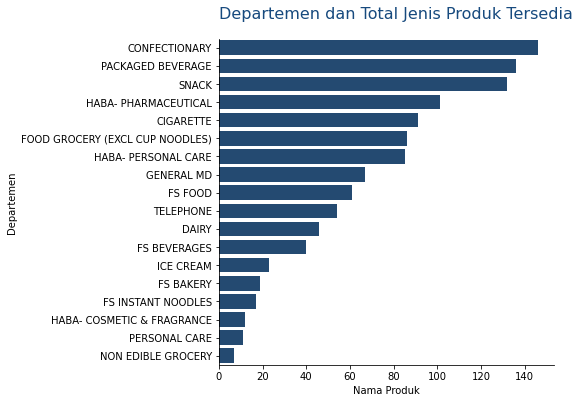

In [ ]:
# Departemen dan jumlah produk yang dijual

plt.figure(figsize=(6,6))
sns.barplot(y='Departemen', x='Nama Produk', ci=None,
            data=df.groupby('Departemen')[['Nama Produk']]
            .nunique().reset_index().sort_values('Nama Produk', ascending=False),
           color= '#174A7E'); #'#828282');
plt.title('Departemen dan Total Jenis Produk Tersedia', color='#174A7E', fontsize=16, pad=20, loc='left')
sns.despine()

In [ ]:
for i in df['Departemen'].unique():
    print('Sampel produk dari departemen', i,':')
    print(df[df['Departemen'] == i].reset_index()['Nama Produk'].unique()[:3])
    print('')

Sampel produk dari departemen TELEPHONE :
['TELKOMSEL EV REGULER 25K' 'TELKOMSEL EV REGULER 100K'
 'INDOSAT YELLOW 16GB']

Sampel produk dari departemen GENERAL MD :
['CK LIGHTER BENETTON SOLID' 'CK TOKAI ORI LOGO CK' 'TRASTI AID MASKER 5S']

Sampel produk dari departemen FS BEVERAGES :
['CK COFFEE CAPPUCCINO 8OZ' 'FROSTER CHOCO 16 OZ'
 'KAPAL API SPC MIX HOT CUP']

Sampel produk dari departemen HABA- PHARMACEUTICAL :
['ANTIS HAND SNTZR JERUK N 55 ML' 'DETTOL HAND SANITIZER BTL 50ML'
 'XON-CE TABLET VIT C 500MG 2S']

Sampel produk dari departemen PACKAGED BEVERAGE :
['YOU C-1000 ORANGE BTL 140 ML' 'GOOD DAY ORIG CAPPUCCINO 250ML'
 'AQUA AIR MINERAL BTL 1500 ML']

Sampel produk dari departemen CONFECTIONARY :
['TIM TAM ATLAS CHOCOLATE 81GR' 'BENG BENG MAXX PACK 32GR'
 'UHA KORORO STRAWBERRY 40GR']

Sampel produk dari departemen CIGARETTE :
['SAMPOERNA A MILD  16S' 'SAMPOERNA HIJAU 12S' 'GGSURYA 16S']

Sampel produk dari departemen FOOD GROCERY (EXCL CUP NOODLES) :
['GOOD DAY CAPPUCINO 5

### Apa yang terjadi di Circle-K Cabang JAK0211 di Q3 2020?
##### Ini sudah masuk ke tahap descriptive analytics

### Tren Pemasukan

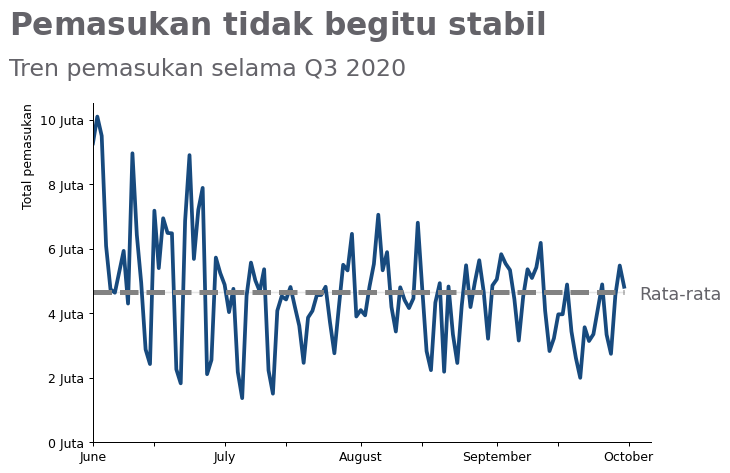

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
ax = sns.lineplot(x='Tanggal', y='Total Belanja', estimator='sum', 
             ci=None, color='#174A7E', linewidth=3, data=df);
sns.lineplot(df['Tanggal'], df.groupby('Tanggal')['Total Belanja'].sum().reset_index()['Total Belanja'].mean(), 
             color='#828282', linewidth=4, linestyle='dashed');

ax.text(-0.15, 1.2, '$\\bf{Pemasukan\ tidak\ begitu\ stabil}$',
         fontsize=25, color='#646369', transform=ax.transAxes)
ax.text(-0.15, 1.08, 'Tren pemasukan selama Q3 2020', 
        fontsize=19, color='#646369', transform=ax.transAxes)
plt.xlabel('')
plt.ylabel('Total pemasukan', loc='top')
group_labels = ['June', '',
             'July', '',
             'August', '',
             'September', '',
             'October']
ax.set_xticklabels(group_labels)
yticks = ax.get_yticks()
plt.setp(ax, yticklabels=[str(int(i/1000000))+' Juta' for i in yticks])

ax.text(0.98,0.42, 'Rata-rata', fontsize=14, color='#646369', transform=ax.transAxes)

plt.xlim(xmin=ax.get_xlim()[0]+6)
plt.ylim(ymin=0)
sns.despine()

#df[df['Departemen'] == 'CONFECTIONARY'].groupby('Nama Produk')[['Qty']].count()

### Pemasukan per Minggu

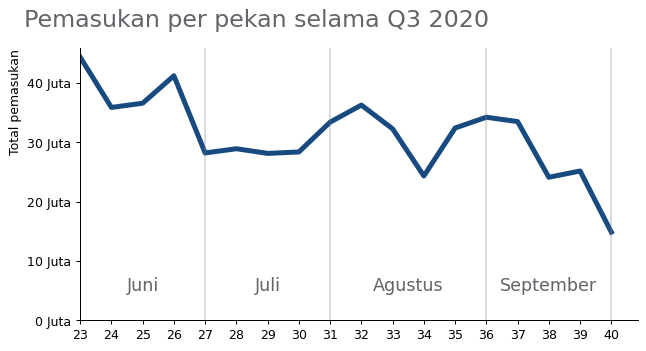

In [ ]:
data_view1 = df.copy()
data_view1['week'] = data_view1['Tanggal'].dt.week
data_view1['week'] = data_view1['week'].apply(lambda x: str(x)) 

fig, ax = plt.subplots(figsize=(8, 4), dpi=90)
ax = sns.lineplot(x='week', y='Total Belanja', estimator='sum', 
                ci=None, color='#174A7E', linewidth=4, data=data_view1);

ax.text(-0.1, 1.08, 'Pemasukan per pekan selama Q3 2020', 
        fontsize=19, color='#646369', transform=ax.transAxes)
plt.xlabel('')
plt.ylabel('Total pemasukan', loc='top')

#plt.yticks(labels, (labels/1000000).astype('int'))

plt.xlim(xmin=ax.get_xlim()[0]+0.84)
plt.ylim(ymin=0)

plt.axvline(x=4, ymax=1, color='#828282', alpha=0.3)
plt.text(2, 5000000, 'Juni', fontsize=14, color='#646369', ha='center')
plt.axvline(x=8, ymax=1, color='#828282', alpha=0.3)
plt.text(6, 5000000, 'Juli', fontsize=14, color='#646369', ha='center')
plt.axvline(x=13, ymax=1, color='#828282', alpha=0.3)
plt.text(10.5, 5000000, 'Agustus', fontsize=14, color='#646369', ha='center')
plt.axvline(x=17, ymax=1, color='#828282', alpha=0.3)
plt.text(15, 5000000, 'September', fontsize=14, color='#646369', ha='center')

yticks = ax.get_yticks()
plt.setp(ax, yticklabels=[str(int(i/1000000))+' Juta' for i in yticks])
labels, locations = plt.yticks()
sns.despine()

### Pemasukan per Bulan

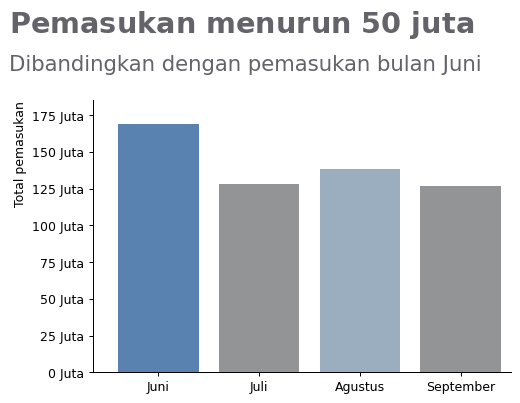

In [ ]:
data_view2 = df.groupby('Bulan')['Total Belanja'].sum().reset_index()

fig, ax = plt.subplots(figsize=(6, 4), dpi=90)
ax = sns.barplot(x='Bulan', y='Total Belanja', estimator=sum, data=data_view2,
            order=['Juni','Juli','Agustus','September'],
           palette=['#4A81BF','#929497','#94AFC5','#929497']);

ax.text(-0.2, 1.25, '$\\bf{Pemasukan\ menurun\ 50\ juta}$',
         fontsize=23, color='#646369', transform=ax.transAxes)
ax.text(-0.2, 1.11, 'Dibandingkan dengan pemasukan bulan Juni', 
        fontsize=17, color='#646369', transform=ax.transAxes)
plt.xlabel('')
plt.ylabel('Total pemasukan', loc='top')

plt.xlim(xmin=ax.get_xlim()[0]-0.15)
plt.ylim(ymin=0, ymax=185000000)

yticks = ax.get_yticks()
plt.setp(ax, yticklabels=[str(int(i/1000000))+' Juta' for i in yticks])
sns.despine()

### Banyak Transaksi terhadap Total Pemasukan

In [ ]:
# Banyak transaksi Vs Total Pemasukan

data_view3 = df.groupby('Bulan')[['Kode Transaksi', 'Total Belanja']] \
            .agg({'Kode Transaksi':'count', 'Total Belanja' :sum})
data_view3.columns = ['Banyak Transaksi', 'Total Pemasukan']
print(data_view3, '\n')
print('Kolerasi Pearson:\n',data_view3.corr())
print('\n\nMenunjukan bahwa dengan banyaknya transaksi, total pemasukan pun bisa bertambah lebih banyak')

           Banyak Transaksi  Total Pemasukan
Bulan                                       
Juni                  11364        168948008
Juli                  10989        127963405
Agustus               11589        138122502
September             10750        126935496 

Kolerasi Pearson:
                   Banyak Transaksi  Total Pemasukan
Banyak Transaksi          1.000000         0.565209
Total Pemasukan           0.565209         1.000000


Menunjukan bahwa dengan banyaknya transaksi, total pemasukan pun bisa bertambah lebih banyak


###  Banyak Transaksi dan Pemasukannya di Weekend dan Weekday

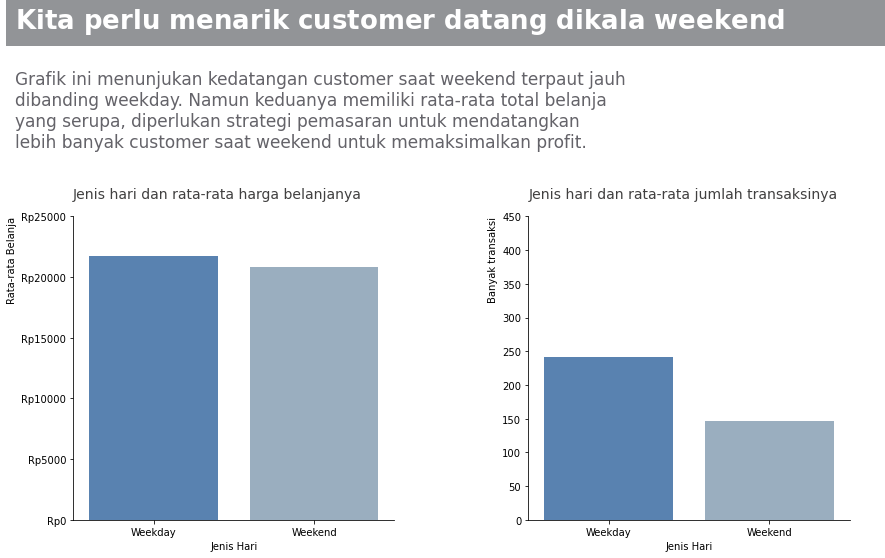

In [ ]:
# Rata-rata banyak transaksi di weekend & weekday

data_view4 = df.groupby('Jenis Hari')[['Kode Transaksi','Total Belanja']] \
            .agg({'Kode Transaksi':'nunique', 'Total Belanja' :'sum'})
data_view4.columns = ['Rata-rata Jumlah Transaksi', 'Rata-rata Belanja']

data_view4.loc[data_view4.index == 'Weekday', 'Rata-rata Belanja'] = int(data_view4[data_view4.index == 'Weekday']['Rata-rata Belanja'] /\
            df[df['Jenis Hari'] == 'Weekday']['Kode Transaksi'].nunique())

data_view4.loc[data_view4.index == 'Weekend', 'Rata-rata Belanja'] = \
            int(data_view4[data_view4.index == 'Weekend']['Rata-rata Belanja'] /\
            df[df['Jenis Hari'] == 'Weekend']['Kode Transaksi'].nunique())

data_view4.loc[data_view4.index == 'Weekday', 'Rata-rata Jumlah Transaksi'] = int(data_view4[data_view4.index == 'Weekday']['Rata-rata Jumlah Transaksi'] /\
            df[df['Jenis Hari'] == 'Weekday']['Tanggal'].nunique())

data_view4.loc[data_view4.index == 'Weekend', 'Rata-rata Jumlah Transaksi'] = \
            int(data_view4[data_view4.index == 'Weekend']['Rata-rata Jumlah Transaksi'] /\
            df[df['Jenis Hari'] == 'Weekend']['Tanggal'].nunique())
    

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5), gridspec_kw={'width_ratios': [10, 1, 10]})

sns.barplot('Jenis Hari', 'Rata-rata Belanja', data=data_view4.reset_index(), ci=None, ax=ax1,
           palette=['#4A81BF', '#94AFC5']);
ax1.set_xlabel('Jenis Hari')
ax1.set_ylabel('Rata-rata Belanja', loc='top')
ax1.set_ylim(ymax=25000)
sns.despine()

sns.barplot('Jenis Hari', 'Rata-rata Jumlah Transaksi', data=data_view4.reset_index(), ci=None, ax=ax3,
           palette=['#4A81BF', '#94AFC5']);
ax3.set_xlabel('Jenis Hari')
ax3.set_ylabel('Banyak transaksi', loc='top')
ax3.set_ylim(ymax=450)
sns.despine()

# title the plot
fig.text(-0.18, 1.62,
         '$\\bf{Kita\ perlu\ menarik\ customer\ datang\ dikala\ weekend}$'+' '*12,
         fontsize=26, transform=ax1.transAxes,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': '#929497', 'pad': 10, 'edgecolor': 'none'})

fig.text(-0.18, 1.23, 'Grafik ini menunjukan kedatangan customer saat weekend terpaut jauh\n\
dibanding weekday. Namun keduanya memiliki rata-rata total belanja\nyang serupa, diperlukan\
 strategi pemasaran untuk mendatangkan\nlebih banyak customer saat weekend untuk memaksimalkan profit.', 
        fontsize=17, color='#646369', transform=ax1.transAxes)

fig.text(0, 1.06, 'Jenis hari dan rata-rata harga belanjanya', 
        fontsize=14, color='#414040', transform=ax1.transAxes, ha='left')
fig.text(0, 1.06, 'Jenis hari dan rata-rata jumlah transaksinya', 
        fontsize=14, color='#414040', transform=ax3.transAxes, ha='left')

yticks = ax1.get_yticks()
plt.setp(ax1, yticklabels=['Rp'+str(int(i)) for i in yticks])

ax2.axis('off')

plt.tight_layout()

plt.savefig('Jenis Hari X Customer', dpi=200, format='png')

### Median dan Rata-rata Transaksi

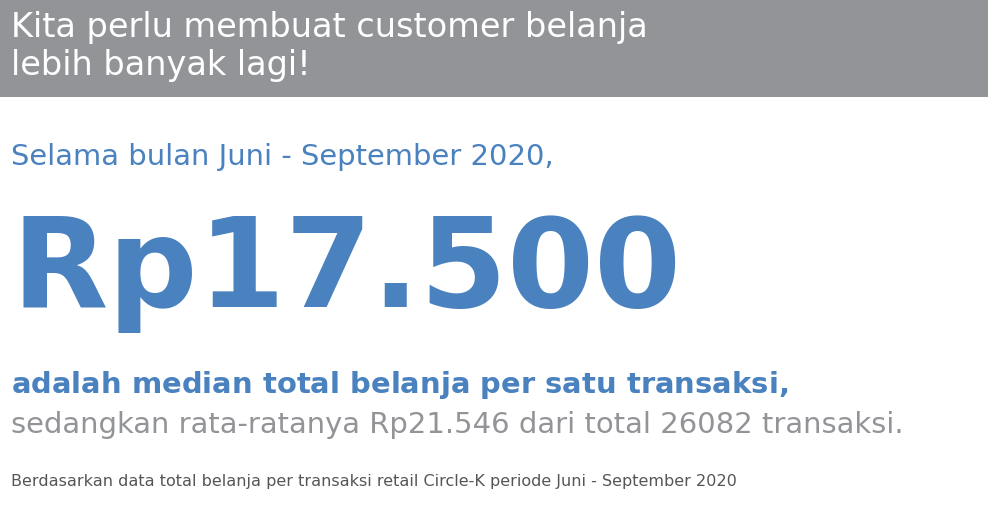

In [ ]:
# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')
plt.axis('off')

# title the plot
plt.text(-0.15, 1.03,
         'Kita perlu membuat customer belanja                      \
         \nlebih banyak lagi!'+' '*5,
         fontsize=22,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': '#929497', 'pad': 10, 'edgecolor': 'none'})

# footnote with the data source
plt.text(-0.15, 0.02,
         'Berdasarkan data total belanja per transaksi '
         'retail Circle-K periode Juni - September 2020 ',
         fontsize=10.5,
         color='#555655')

# add note to the plot
plt.text(-0.15, 0.81,
         'Selama bulan Juni - September 2020,',
         fontsize=19,
         color='#4A81BF')

# add note to the plot
plt.text(-0.15, 0.46,
         '$\\bf{Rp17.500}$', # use mathtext \\bf for bold text
         fontsize=82,
         color='#4A81BF')

# add note to the plot
plt.text(-0.15, 0.25,
         # use mathtext \\bf for bold text
         '$\\bf{adalah\ median\ total\ belanja\ per\ satu\ transaksi,}$',
         fontsize=19,
         color='#4A81BF') 

# add note to the plot
plt.text(-0.15, 0.15,
         'sedangkan rata-ratanya Rp21.546 dari total {} transaksi.'.format(df['Kode Transaksi'].nunique()),
         fontsize=19,
         color='#929497')

plt.show()

### Distribusi Barang dibeli per Transaksi

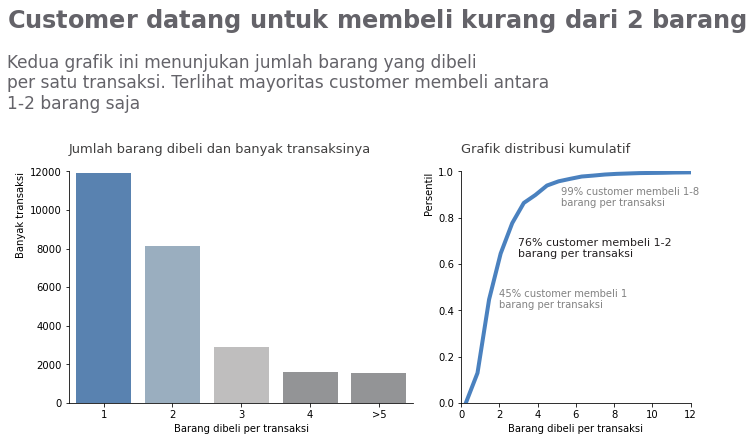

In [ ]:
# Customer tiap transaksi barangnya berapa banyak sih yang dibeli

data_view5_b = df.groupby('Kode Transaksi')['Qty'].sum().reset_index()

data_view5_a = data_view5_b.groupby('Qty')['Kode Transaksi'].count().reset_index()
data_view5_a.columns = ['Barang dibeli','Banyaknya']
data_view5_a.loc[data_view5_a['Barang dibeli']==5, 'Banyaknya'] = data_view5_a['Banyaknya'][4:].sum()
data_view5_a = data_view5_a.iloc[0:5]
data_view5_a['Barang dibeli'].replace(5, '>5', inplace=True)
data_view5_a

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), gridspec_kw={'width_ratios': [3, 2]})


sns.barplot('Barang dibeli', 'Banyaknya', data=data_view5_a, ci=None, ax=ax1,
           palette=['#4A81BF','#94AFC5', '#BFBEBE', '#929497', '#929497']);
ax1.set_xlabel('Barang dibeli per transaksi')
ax1.set_ylabel('Banyak transaksi', loc='top')
ax1.set_ylim(ymax=12000)
sns.despine()

sns.kdeplot(data = data_view5_b['Qty'], cumulative = True, label = "X2", ax=ax2,
           linewidth=4, color='#4A81BF');
ax2.set_xlabel('Barang dibeli per transaksi')
ax2.set_ylabel('Persentil', loc='top')
ax2.set_ylim(ymax=1)
ax2.set_xlim(xmax=12, xmin=0)
sns.despine()

fig.text(-0.18, 1.62, '$\\bf{Customer\ datang\ untuk\ membeli\ kurang\ dari\ 2\ barang}$',
        fontsize=24, color='#646369', transform=ax1.transAxes) 
fig.text(-0.18, 1.27, 'Kedua grafik ini menunjukan jumlah barang yang dibeli\nper satu transaksi.\
 Terlihat mayoritas customer membeli antara\n1-2 barang saja', 
        fontsize=17, color='#646369', transform=ax1.transAxes)

fig.text(0, 1.08, 'Jumlah barang dibeli dan banyak transaksinya', 
        fontsize=13, color='#414040', transform=ax1.transAxes, ha='left')
fig.text(0, 1.08, 'Grafik distribusi kumulatif', 
        fontsize=13, color='#414040', transform=ax2.transAxes, ha='left')

ax2.text((data_view5_b.quantile(0.95).values + 0.25), 0.85, '99% customer membeli 1-8\nbarang per transaksi', 
        fontsize=10, color='#828282',ha='left')

ax2.text((data_view5_b.quantile(0.76).values + 1), 0.63, '76% customer membeli 1-2\nbarang per transaksi', 
        fontsize=11, color='#231F20',ha='left')

ax2.text((data_view5_b.quantile(0.45).values + 1), 0.41, '45% customer membeli 1\nbarang per transaksi', 
        fontsize=10, color='#828282',ha='left')
fig.tight_layout()


### Distribusi Total Belanja per Transaksi

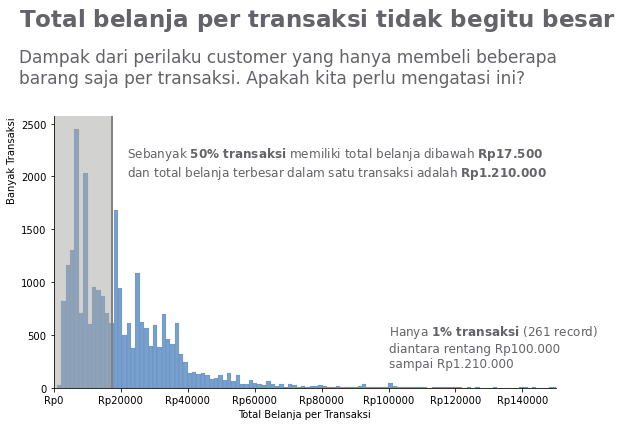

In [ ]:
data_view6 = df.groupby('Kode Transaksi')['Total Belanja'].sum().reset_index()

# Customer tiap transaksi biasanya ngeluarin berapa uang ya?

plt.figure(figsize=(9,5))
ax = sns.histplot(data_view6['Total Belanja'], color='#4A81BF');

ax.text(-0.07, 1.33, '$\\bf{Total\ belanja\ per\ transaksi\ tidak\ begitu\ besar}$',
        fontsize=23, color='#646369', transform=ax.transAxes)
ax.text(-0.07, 1.12, 'Dampak dari perilaku customer yang hanya membeli beberapa\nbarang saja per transaksi. Apakah kita perlu mengatasi ini?', 
        fontsize=17, color='#646369', transform=ax.transAxes)
plt.xlabel('Total Belanja per Transaksi')
plt.ylabel('Banyak Transaksi', loc='top')

plt.axvline(data_view6['Total Belanja'].median(), color='#828282', linewidth=2)

plt.xlim(xmin=0, xmax=150000)
xticks = ax.get_xticks()
plt.setp(ax, xticklabels=['Rp'+str(int(i)) for i in xticks])

median = round(data_view6['Total Belanja'].median())

plt.text(22000, 2000, 'Sebanyak $\\bf{50\%\ transaksi}$ memiliki total belanja dibawah $\\bf{{Rp17.500}}$\ndan total belanja terbesar dalam satu transaksi adalah $\\bf{{Rp1.210.000}}$'
         , fontsize=12, color='#646369', ha='left')
plt.text(100000, 200, 'Hanya $\\bf{1\%\ transaksi}$ (261 record)\ndiantara rentang Rp100.000\nsampai Rp1.210.000'
         , fontsize=12, color='#646369', ha='left')

plt.axvspan(0, data_view6['Total Belanja'].median(), color='#A6A6A5', alpha=0.5, lw=0)
sns.despine()
#round(df['Total Belanja'].sum() / df['Kode Transaksi'].nunique(),3)

# To be continue..

### Distribusi Waktu Transaksi

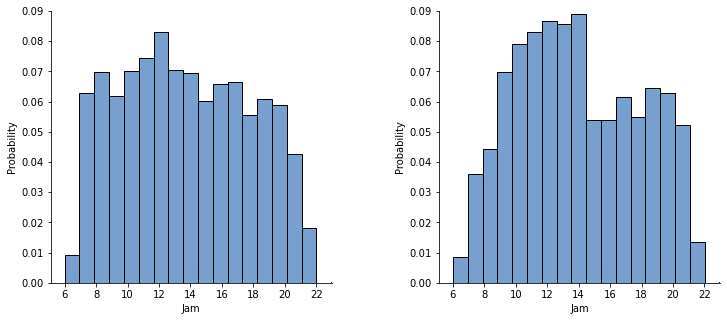

In [ ]:
data_view7 = df.groupby(['Jenis Hari','Kode Transaksi'])['Jam'].mean().reset_index()
data_view7['Jam'] = data_view7['Jam'].apply(lambda x: int(x))

data_view7_weekday = data_view7[data_view7['Jenis Hari'] == 'Weekday']
data_view7_weekend = data_view7[data_view7['Jenis Hari'] == 'Weekend']

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5), gridspec_kw={'width_ratios': [10, 1, 10]})

sns.histplot(data_view7_weekday['Jam'], binwidth=0.942, color='#4A81BF', ax=ax1, stat='probability')
#ax1.set_xlabel('Jenis Hari')
#ax1.set_ylabel('Rata-rata Belanja', loc='top')
ax1.set_xlim(xmax=23)
ax1.set_ylim(ymax=0.09)
sns.despine()

ax2.axis('off')

sns.histplot(data_view7_weekend['Jam'], binwidth=0.942, color='#4A81BF', ax=ax3, stat='probability')
#ax3.set_xlabel('Jenis Hari')
#ax3.set_ylabel('Banyak transaksi', loc='top')
ax3.set_xlim(xmax=23)
ax3.set_ylim(ymax=0.09)
sns.despine()


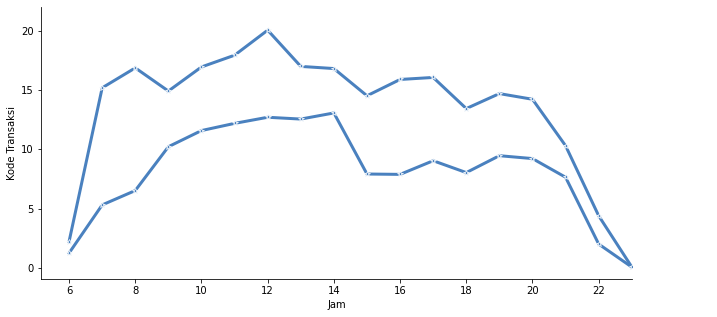

In [ ]:
data_view7 = df.groupby(['Jenis Hari','Kode Transaksi'])['Jam'].mean().reset_index()
data_view7['Jam'] = data_view7['Jam'].apply(lambda x: int(x))

jum_weekday = df[df['Jenis Hari'] == 'Weekday']['Tanggal'].nunique()
jum_weekend = df[df['Jenis Hari'] == 'Weekend']['Tanggal'].nunique()

data_view7_weekday = data_view7[data_view7['Jenis Hari'] == 'Weekday']
data_view7_weekend = data_view7[data_view7['Jenis Hari'] == 'Weekend']

data_view7_weekday = data_view7_weekday.groupby('Jam')['Kode Transaksi'].count().reset_index()
data_view7_weekday['Kode Transaksi'] = data_view7_weekday['Kode Transaksi'].apply(lambda x : x / jum_weekday)

data_view7_weekend = data_view7_weekend.groupby('Jam')['Kode Transaksi'].count().reset_index()
data_view7_weekend['Kode Transaksi'] = data_view7_weekend['Kode Transaksi'].apply(lambda x : x / jum_weekend)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,5), gridspec_kw={'width_ratios': [10, -0, 0]})

sns.lineplot('Jam', 'Kode Transaksi', data = data_view7_weekday, color='#4A81BF', ax=ax1,
            linewidth=3, marker='*')
#ax1.set_xlabel('Jenis Hari')
#ax1.set_ylabel('Rata-rata Belanja', loc='top')
ax1.set_xlim(xmax=23)
ax1.set_ylim(ymax=22)
sns.despine()

ax2.axis('off')


sns.lineplot('Jam', 'Kode Transaksi', data = data_view7_weekend, color='#4A81BF', ax=ax1,
            linewidth=3, marker='*')
#ax3.set_xlabel('Jenis Hari')
#ax3.set_ylabel('Banyak transaksi', loc='top')
ax3.set_xlim(xmax=23)
ax3.set_ylim(ymax=22)
ax3.axis('off')
sns.despine()